In [1]:
from config import *


In [2]:
print(f"{year}-{month:02}")

2020-08


In [3]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import numpy as np
import math


In [4]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [5]:
#from map_wrapper import *
#from mpl_toolkits.basemap import Basemap

In [6]:
conn=db.get_conn()

In [8]:

cities = """
('北京','上海','深圳','杭州','广州','南京','苏州','成都','东莞','西安','武汉','天津','长沙',
'宁波','福州','大连','重庆','青岛','济南','合肥','长春','昆明','郑州','沈阳','哈尔滨','厦门')
"""
data_original=pd.read_sql(sql=f"select * from jobs where year_month={year}{month:02} and monthly_salary>0 and monthly_salary<80000 and city in {cities}", con=conn)


In [9]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [10]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['job_description']
del data['job_id']

In [11]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['平均工资']=salary_mean
    sub_data['最低工资']=salary_95_min
    sub_data['中位数']=salary_median
    sub_data['最高工资']=salary_95_max
    sub_data['招聘人数']=count
    sub_data['百分比']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='平均工资', ascending=False)

    return sub_data

data_format={"百分比":"{:.2%}","平均工资":"{:.0f}","中位数":"{:.0f}","最低工资":"{:.0f}","最高工资":"{:.0f}"}

translate_dict={}


# 程序员工资

In [12]:
data_city=get_sub_stats_by_col(data,'city')
data_city['排名']=list(range(1,data_city.shape[0]+1))
data_city=data_city[['排名', 'city', '平均工资', '最低工资', '中位数', '最高工资', '招聘人数', '百分比']]
data_city.style.format(data_format)

,排名,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
14,1,北京,19239,7000,17500,45000,27811,8.88%
0,2,上海,17417,7000,15500,39583,55555,17.74%
2,3,深圳,16887,7000,15000,37500,51001,16.28%
5,4,杭州,15764,5500,14000,37500,18166,5.80%
7,5,广州,14142,5250,12500,30000,34738,11.09%
1,6,南京,13760,5250,12500,27500,16625,5.31%
15,7,东莞,13316,5250,12500,25000,3821,1.22%
10,8,苏州,12840,5250,12500,27500,9702,3.10%
3,9,成都,12712,3750,12000,30000,16307,5.21%
4,10,大连,12393,4699,10866,30000,6539,2.09%


In [13]:
def describe(data_city, career):
    for index, row in data_city.iterrows():
        print(f"{year}年{month}月{row['city']}招收{career}{row['招聘人数']}人。2019年{month}月{row['city']}{career}平均工资{row['平均工资']:.0f}元，工资中位数{row['中位数']:.0f}元，其中95%的人的工资介于{row['最低工资']:.0f}元到{row['最高工资']:.0f}元。\r\n")

In [14]:
career='软件工程师'
for index, row in data_city.iterrows():
    print(f"{year}年{month}月{row['city']}招收{career}{row['招聘人数']}人。2019年{month}月{row['city']}{career}平均工资{row['平均工资']:.0f}元，工资中位数{row['中位数']:.0f}元，其中95%的人的工资介于{row['最低工资']:.0f}元到{row['最高工资']:.0f}元。\r\n")

2020年8月北京招收软件工程师27811人。2019年8月北京软件工程师平均工资19239元，工资中位数17500元，其中95%的人的工资介于7000元到45000元。

2020年8月上海招收软件工程师55555人。2019年8月上海软件工程师平均工资17417元，工资中位数15500元，其中95%的人的工资介于7000元到39583元。

2020年8月深圳招收软件工程师51001人。2019年8月深圳软件工程师平均工资16887元，工资中位数15000元，其中95%的人的工资介于7000元到37500元。

2020年8月杭州招收软件工程师18166人。2019年8月杭州软件工程师平均工资15764元，工资中位数14000元，其中95%的人的工资介于5500元到37500元。

2020年8月广州招收软件工程师34738人。2019年8月广州软件工程师平均工资14142元，工资中位数12500元，其中95%的人的工资介于5250元到30000元。

2020年8月南京招收软件工程师16625人。2019年8月南京软件工程师平均工资13760元，工资中位数12500元，其中95%的人的工资介于5250元到27500元。

2020年8月东莞招收软件工程师3821人。2019年8月东莞软件工程师平均工资13316元，工资中位数12500元，其中95%的人的工资介于5250元到25000元。

2020年8月苏州招收软件工程师9702人。2019年8月苏州软件工程师平均工资12840元，工资中位数12500元，其中95%的人的工资介于5250元到27500元。

2020年8月成都招收软件工程师16307人。2019年8月成都软件工程师平均工资12712元，工资中位数12000元，其中95%的人的工资介于3750元到30000元。

2020年8月大连招收软件工程师6539人。2019年8月大连软件工程师平均工资12393元，工资中位数10866元，其中95%的人的工资介于4699元到30000元。

2020年8月厦门招收软件工程师2072人。2019年8月厦门软件工程师平均工资12322元，工资中位数12500元，其中95%的人的工资介于3750元到22500元。

2020年8月长沙招收软件工程师7676人。2019年8月长沙软件工程师平均工资12152元，

In [15]:
describe(data_city,'软件工程师')

2020年8月北京招收软件工程师27811人。2019年8月北京软件工程师平均工资19239元，工资中位数17500元，其中95%的人的工资介于7000元到45000元。

2020年8月上海招收软件工程师55555人。2019年8月上海软件工程师平均工资17417元，工资中位数15500元，其中95%的人的工资介于7000元到39583元。

2020年8月深圳招收软件工程师51001人。2019年8月深圳软件工程师平均工资16887元，工资中位数15000元，其中95%的人的工资介于7000元到37500元。

2020年8月杭州招收软件工程师18166人。2019年8月杭州软件工程师平均工资15764元，工资中位数14000元，其中95%的人的工资介于5500元到37500元。

2020年8月广州招收软件工程师34738人。2019年8月广州软件工程师平均工资14142元，工资中位数12500元，其中95%的人的工资介于5250元到30000元。

2020年8月南京招收软件工程师16625人。2019年8月南京软件工程师平均工资13760元，工资中位数12500元，其中95%的人的工资介于5250元到27500元。

2020年8月东莞招收软件工程师3821人。2019年8月东莞软件工程师平均工资13316元，工资中位数12500元，其中95%的人的工资介于5250元到25000元。

2020年8月苏州招收软件工程师9702人。2019年8月苏州软件工程师平均工资12840元，工资中位数12500元，其中95%的人的工资介于5250元到27500元。

2020年8月成都招收软件工程师16307人。2019年8月成都软件工程师平均工资12712元，工资中位数12000元，其中95%的人的工资介于3750元到30000元。

2020年8月大连招收软件工程师6539人。2019年8月大连软件工程师平均工资12393元，工资中位数10866元，其中95%的人的工资介于4699元到30000元。

2020年8月厦门招收软件工程师2072人。2019年8月厦门软件工程师平均工资12322元，工资中位数12500元，其中95%的人的工资介于3750元到22500元。

2020年8月长沙招收软件工程师7676人。2019年8月长沙软件工程师平均工资12152元，

In [16]:
#draw_city_map(data_city,2000,f'{year}年{month}月中国大陆主要城市程序员工资')

# 区块链工程师

In [17]:
data_blockchain=get_sub_stats_by_col(data[(data['career']=='区块链开发')],'city')

data_blockchain.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
9,大连,30000,30000,30000,30000,1,0.15%
10,北京,24700,12500,25000,35000,25,3.64%
2,杭州,22391,12188,22500,47812,55,8.01%
6,长沙,21731,10000,15000,40000,13,1.89%
3,深圳,21358,11500,21900,35145,106,15.43%
4,上海,19633,9000,20000,35792,121,17.61%
17,合肥,19167,17500,19167,22500,3,0.44%
11,宁波,18611,17500,18611,20833,3,0.44%
12,东莞,18000,18000,18000,18000,5,0.73%
1,广州,17872,8917,15000,30000,200,29.11%


In [18]:
describe(data_blockchain,'区块链工程师')

2020年8月大连招收区块链工程师1人。2019年8月大连区块链工程师平均工资30000元，工资中位数30000元，其中95%的人的工资介于30000元到30000元。

2020年8月北京招收区块链工程师25人。2019年8月北京区块链工程师平均工资24700元，工资中位数25000元，其中95%的人的工资介于12500元到35000元。

2020年8月杭州招收区块链工程师55人。2019年8月杭州区块链工程师平均工资22391元，工资中位数22500元，其中95%的人的工资介于12188元到47812元。

2020年8月长沙招收区块链工程师13人。2019年8月长沙区块链工程师平均工资21731元，工资中位数15000元，其中95%的人的工资介于10000元到40000元。

2020年8月深圳招收区块链工程师106人。2019年8月深圳区块链工程师平均工资21358元，工资中位数21900元，其中95%的人的工资介于11500元到35145元。

2020年8月上海招收区块链工程师121人。2019年8月上海区块链工程师平均工资19633元，工资中位数20000元，其中95%的人的工资介于9000元到35792元。

2020年8月合肥招收区块链工程师3人。2019年8月合肥区块链工程师平均工资19167元，工资中位数19167元，其中95%的人的工资介于17500元到22500元。

2020年8月宁波招收区块链工程师3人。2019年8月宁波区块链工程师平均工资18611元，工资中位数18611元，其中95%的人的工资介于17500元到20833元。

2020年8月东莞招收区块链工程师5人。2019年8月东莞区块链工程师平均工资18000元，工资中位数18000元，其中95%的人的工资介于18000元到18000元。

2020年8月广州招收区块链工程师200人。2019年8月广州区块链工程师平均工资17872元，工资中位数15000元，其中95%的人的工资介于8917元到30000元。

2020年8月南京招收区块链工程师15人。2019年8月南京区块链工程师平均工资17067元，工资中位数17500元，其中95%的人的工资介于10000元到22500元。

2020年8月成都招收区块链工程师36人。2019年8月成都区块链工程师平均工资16208元

In [19]:
#draw_city_map(data_blockchain[data_blockchain['招聘人数']>10],10,f'{year}年{month}月中国大陆主要城市区块链工程师工资')

# 机器学习工程师

In [20]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='机器学习'],'city')
data_city_algorithm.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
1,北京,29524,12479,30000,60000,194,17.46%
7,深圳,25382,8103,22214,53340,162,14.58%
0,上海,24644,7000,22500,62964,194,17.46%
15,厦门,22500,22500,22500,22500,5,0.45%
6,南京,20990,9000,20000,53250,49,4.41%
8,合肥,18750,17500,18333,20000,4,0.36%
4,杭州,18500,11250,17929,32825,54,4.86%
11,青岛,18250,7000,12500,45000,6,0.54%
22,大连,17929,17000,17167,20000,7,0.63%
3,广州,16244,9017,12500,30000,101,9.09%


In [21]:
describe(data_city_algorithm,'机器学习')

2020年8月北京招收机器学习194人。2019年8月北京机器学习平均工资29524元，工资中位数30000元，其中95%的人的工资介于12479元到60000元。

2020年8月深圳招收机器学习162人。2019年8月深圳机器学习平均工资25382元，工资中位数22214元，其中95%的人的工资介于8103元到53340元。

2020年8月上海招收机器学习194人。2019年8月上海机器学习平均工资24644元，工资中位数22500元，其中95%的人的工资介于7000元到62964元。

2020年8月厦门招收机器学习5人。2019年8月厦门机器学习平均工资22500元，工资中位数22500元，其中95%的人的工资介于22500元到22500元。

2020年8月南京招收机器学习49人。2019年8月南京机器学习平均工资20990元，工资中位数20000元，其中95%的人的工资介于9000元到53250元。

2020年8月合肥招收机器学习4人。2019年8月合肥机器学习平均工资18750元，工资中位数18333元，其中95%的人的工资介于17500元到20000元。

2020年8月杭州招收机器学习54人。2019年8月杭州机器学习平均工资18500元，工资中位数17929元，其中95%的人的工资介于11250元到32825元。

2020年8月青岛招收机器学习6人。2019年8月青岛机器学习平均工资18250元，工资中位数12500元，其中95%的人的工资介于7000元到45000元。

2020年8月大连招收机器学习7人。2019年8月大连机器学习平均工资17929元，工资中位数17167元，其中95%的人的工资介于17000元到20000元。

2020年8月广州招收机器学习101人。2019年8月广州机器学习平均工资16244元，工资中位数12500元，其中95%的人的工资介于9017元到30000元。

2020年8月成都招收机器学习39人。2019年8月成都机器学习平均工资15947元，工资中位数17500元，其中95%的人的工资介于3750元到27500元。

2020年8月沈阳招收机器学习5人。2019年8月沈阳机器学习平均工资15300元，工资中位数11500元，其中95%的人的工资介于5000元到37500元。

2020年8月西安招收机

In [22]:
#draw_city_map(data_city_algorithm,100,f'{year}年{month}月中国大陆主要城市机器学习工资')

# 系统架构师

In [23]:
data_city_architect=get_sub_stats_by_col(data[data.career=='架构师'],'city')
data_city_architect.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
5,北京,32576,13383,30000,60000,923,15.15%
4,深圳,31555,12500,30000,55000,975,16.01%
2,上海,30922,12500,30000,55235,1191,19.55%
6,杭州,28487,12500,27500,45000,447,7.34%
3,广州,26365,12000,25000,46500,740,12.15%
1,南京,24008,10438,25000,39962,264,4.33%
10,成都,23238,7318,20833,51643,229,3.76%
21,厦门,23203,10000,25000,27500,32,0.53%
9,宁波,22616,10275,21389,40000,51,0.84%
12,苏州,22223,2625,17500,75000,90,1.48%


In [24]:
describe(data_city_architect,'架构师')

2020年8月北京招收架构师923人。2019年8月北京架构师平均工资32576元，工资中位数30000元，其中95%的人的工资介于13383元到60000元。

2020年8月深圳招收架构师975人。2019年8月深圳架构师平均工资31555元，工资中位数30000元，其中95%的人的工资介于12500元到55000元。

2020年8月上海招收架构师1191人。2019年8月上海架构师平均工资30922元，工资中位数30000元，其中95%的人的工资介于12500元到55235元。

2020年8月杭州招收架构师447人。2019年8月杭州架构师平均工资28487元，工资中位数27500元，其中95%的人的工资介于12500元到45000元。

2020年8月广州招收架构师740人。2019年8月广州架构师平均工资26365元，工资中位数25000元，其中95%的人的工资介于12000元到46500元。

2020年8月南京招收架构师264人。2019年8月南京架构师平均工资24008元，工资中位数25000元，其中95%的人的工资介于10438元到39962元。

2020年8月成都招收架构师229人。2019年8月成都架构师平均工资23238元，工资中位数20833元，其中95%的人的工资介于7318元到51643元。

2020年8月厦门招收架构师32人。2019年8月厦门架构师平均工资23203元，工资中位数25000元，其中95%的人的工资介于10000元到27500元。

2020年8月宁波招收架构师51人。2019年8月宁波架构师平均工资22616元，工资中位数21389元，其中95%的人的工资介于10275元到40000元。

2020年8月苏州招收架构师90人。2019年8月苏州架构师平均工资22223元，工资中位数17500元，其中95%的人的工资介于2625元到75000元。

2020年8月东莞招收架构师27人。2019年8月东莞架构师平均工资21028元，工资中位数22500元，其中95%的人的工资介于11675元到35000元。

2020年8月武汉招收架构师305人。2019年8月武汉架构师平均工资20841元，工资中位数20000元，其中95%的人的工资介于7000元到44062元。

2020年8月西安招收架构师137人。201

In [25]:
#draw_city_map(data_city_architect,40,f'{year}年{month}月中国大陆主要城市【架构师】工资')

# 生物信息工程师

In [26]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息'],'city')
data_bio.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
5,杭州,20833,20833,20833,20833,1,2.94%
6,广州,16667,14000,16667,30000,6,17.65%
2,宁波,16000,16000,16000,16000,1,2.94%
7,北京,14000,10000,14000,20000,5,14.71%
0,苏州,12500,12500,12500,12500,1,2.94%
3,长沙,12500,12500,12500,12500,3,8.82%
1,上海,11900,8000,11500,17500,10,29.41%
4,福州,6500,6500,6500,6500,2,5.88%
8,成都,6500,6500,6500,6500,5,14.71%


In [27]:
describe(data_bio,'生物信息工程师')

2020年8月杭州招收生物信息工程师1人。2019年8月杭州生物信息工程师平均工资20833元，工资中位数20833元，其中95%的人的工资介于20833元到20833元。

2020年8月广州招收生物信息工程师6人。2019年8月广州生物信息工程师平均工资16667元，工资中位数16667元，其中95%的人的工资介于14000元到30000元。

2020年8月宁波招收生物信息工程师1人。2019年8月宁波生物信息工程师平均工资16000元，工资中位数16000元，其中95%的人的工资介于16000元到16000元。

2020年8月北京招收生物信息工程师5人。2019年8月北京生物信息工程师平均工资14000元，工资中位数14000元，其中95%的人的工资介于10000元到20000元。

2020年8月苏州招收生物信息工程师1人。2019年8月苏州生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2020年8月长沙招收生物信息工程师3人。2019年8月长沙生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2020年8月上海招收生物信息工程师10人。2019年8月上海生物信息工程师平均工资11900元，工资中位数11500元，其中95%的人的工资介于8000元到17500元。

2020年8月福州招收生物信息工程师2人。2019年8月福州生物信息工程师平均工资6500元，工资中位数6500元，其中95%的人的工资介于6500元到6500元。

2020年8月成都招收生物信息工程师5人。2019年8月成都生物信息工程师平均工资6500元，工资中位数6500元，其中95%的人的工资介于6500元到6500元。



In [28]:
#draw_city_map(data_bio,2,f'{year}年{month}月中国大陆主要城市【生物信息工程师】工资')

# 爬虫工程师

In [29]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫开发工程师'],'city')
data_spider=data_spider[data_spider['招聘人数']>10]
data_spider.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
6,北京,19800,9000,18750,35000,30,6.28%
7,杭州,18062,7000,17083,27500,16,3.35%
3,南京,16685,8088,15333,32500,27,5.65%
0,深圳,15661,7250,15000,26250,110,23.01%
5,上海,14036,4535,13500,28417,98,20.50%
1,广州,13637,6662,12833,20000,73,15.27%
11,合肥,12974,6000,10250,20833,16,3.35%
2,长沙,10947,9000,10000,15000,19,3.97%
8,武汉,10833,6500,11071,19458,33,6.90%
9,成都,8528,1750,11500,15000,18,3.77%


In [30]:
describe(data_spider, '爬虫开发工程师')

2020年8月北京招收爬虫开发工程师30人。2019年8月北京爬虫开发工程师平均工资19800元，工资中位数18750元，其中95%的人的工资介于9000元到35000元。

2020年8月杭州招收爬虫开发工程师16人。2019年8月杭州爬虫开发工程师平均工资18062元，工资中位数17083元，其中95%的人的工资介于7000元到27500元。

2020年8月南京招收爬虫开发工程师27人。2019年8月南京爬虫开发工程师平均工资16685元，工资中位数15333元，其中95%的人的工资介于8088元到32500元。

2020年8月深圳招收爬虫开发工程师110人。2019年8月深圳爬虫开发工程师平均工资15661元，工资中位数15000元，其中95%的人的工资介于7250元到26250元。

2020年8月上海招收爬虫开发工程师98人。2019年8月上海爬虫开发工程师平均工资14036元，工资中位数13500元，其中95%的人的工资介于4535元到28417元。

2020年8月广州招收爬虫开发工程师73人。2019年8月广州爬虫开发工程师平均工资13637元，工资中位数12833元，其中95%的人的工资介于6662元到20000元。

2020年8月合肥招收爬虫开发工程师16人。2019年8月合肥爬虫开发工程师平均工资12974元，工资中位数10250元，其中95%的人的工资介于6000元到20833元。

2020年8月长沙招收爬虫开发工程师19人。2019年8月长沙爬虫开发工程师平均工资10947元，工资中位数10000元，其中95%的人的工资介于9000元到15000元。

2020年8月武汉招收爬虫开发工程师33人。2019年8月武汉爬虫开发工程师平均工资10833元，工资中位数11071元，其中95%的人的工资介于6500元到19458元。

2020年8月成都招收爬虫开发工程师18人。2019年8月成都爬虫开发工程师平均工资8528元，工资中位数11500元，其中95%的人的工资介于1750元到15000元。

2020年8月郑州招收爬虫开发工程师13人。2019年8月郑州爬虫开发工程师平均工资8135元，工资中位数8429元，其中95%的人的工资介于3750元到9000元。



In [31]:
#draw_city_map(data_spider,5,f'{year}年{month}月中国大陆主要城市【爬虫工程师】工资')

# Java程序员

In [32]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'city')
data_java.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
11,北京,19015,7000,16500,45000,11713,10.07%
3,上海,17387,7000,16000,37500,19552,16.80%
1,深圳,17373,7500,16000,37500,16985,14.60%
10,杭州,16447,7000,15000,37618,7049,6.06%
5,广州,14729,6500,12500,30000,14042,12.07%
0,南京,13698,6000,12500,27500,7095,6.10%
21,东莞,13554,5658,12500,22500,898,0.77%
7,大连,12874,5000,10500,31064,3049,2.62%
16,厦门,12690,3750,12500,22500,891,0.77%
20,苏州,12477,5500,11500,27500,2718,2.34%


In [33]:
describe(data_java, 'Java程序员')

2020年8月北京招收Java程序员11713人。2019年8月北京Java程序员平均工资19015元，工资中位数16500元，其中95%的人的工资介于7000元到45000元。

2020年8月上海招收Java程序员19552人。2019年8月上海Java程序员平均工资17387元，工资中位数16000元，其中95%的人的工资介于7000元到37500元。

2020年8月深圳招收Java程序员16985人。2019年8月深圳Java程序员平均工资17373元，工资中位数16000元，其中95%的人的工资介于7500元到37500元。

2020年8月杭州招收Java程序员7049人。2019年8月杭州Java程序员平均工资16447元，工资中位数15000元，其中95%的人的工资介于7000元到37618元。

2020年8月广州招收Java程序员14042人。2019年8月广州Java程序员平均工资14729元，工资中位数12500元，其中95%的人的工资介于6500元到30000元。

2020年8月南京招收Java程序员7095人。2019年8月南京Java程序员平均工资13698元，工资中位数12500元，其中95%的人的工资介于6000元到27500元。

2020年8月东莞招收Java程序员898人。2019年8月东莞Java程序员平均工资13554元，工资中位数12500元，其中95%的人的工资介于5658元到22500元。

2020年8月大连招收Java程序员3049人。2019年8月大连Java程序员平均工资12874元，工资中位数10500元，其中95%的人的工资介于5000元到31064元。

2020年8月厦门招收Java程序员891人。2019年8月厦门Java程序员平均工资12690元，工资中位数12500元，其中95%的人的工资介于3750元到22500元。

2020年8月苏州招收Java程序员2718人。2019年8月苏州Java程序员平均工资12477元，工资中位数11500元，其中95%的人的工资介于5500元到27500元。

2020年8月武汉招收Java程序员6046人。2019年8月武汉Java程序员平均工资12134元，工资中位数11500元，其中95%的人的工资介于5250元到26000元。

2020年8月长

In [34]:
#draw_city_map(data_java, 500, f'{year}年{month}月中国大陆主要城市【Java工程师】工资')

In [49]:
history_data = pd.read_sql(sql='select * from City_Stats', con=conn)

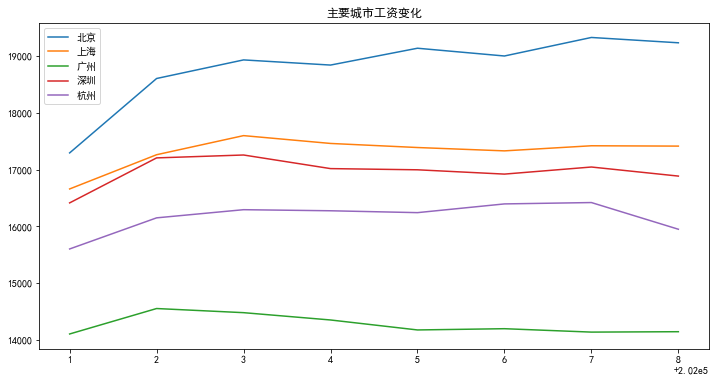

In [50]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
plt.figure(figsize=(12,6))
cities = set(history_data.city)
cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    plt.plot("year_month","salary",data=history_data[history_data.city==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend()
plt.show()

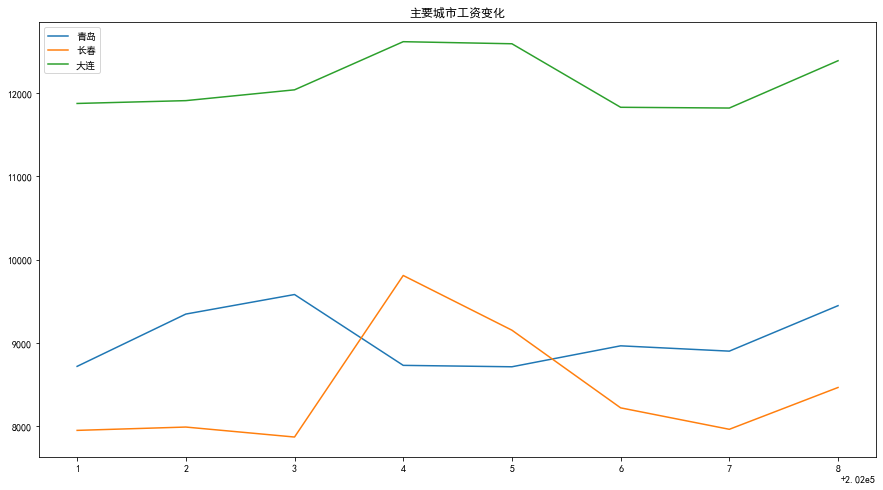

In [51]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
plt.figure(figsize=(15,8))
cities = set(history_data.city)
#cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    values=history_data[history_data.city==city]['salary'].values
    if abs(values[-1]-values[-2])>500:
        plt.plot("year_month","salary",data=history_data[history_data.city==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend( loc='upper left')
plt.show()

In [54]:
values=history_data[history_data.city==city]['salary'].values

In [55]:
values

array([11878, 11912, 12042, 12621, 12596, 11832, 11823, 12392],
      dtype=int64)